In [1]:
import mlrose_hiive as mlrose
import pandas as pd
import numpy as np
import joblib
from tqdm import tqdm
import time

In [2]:
import sklearn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

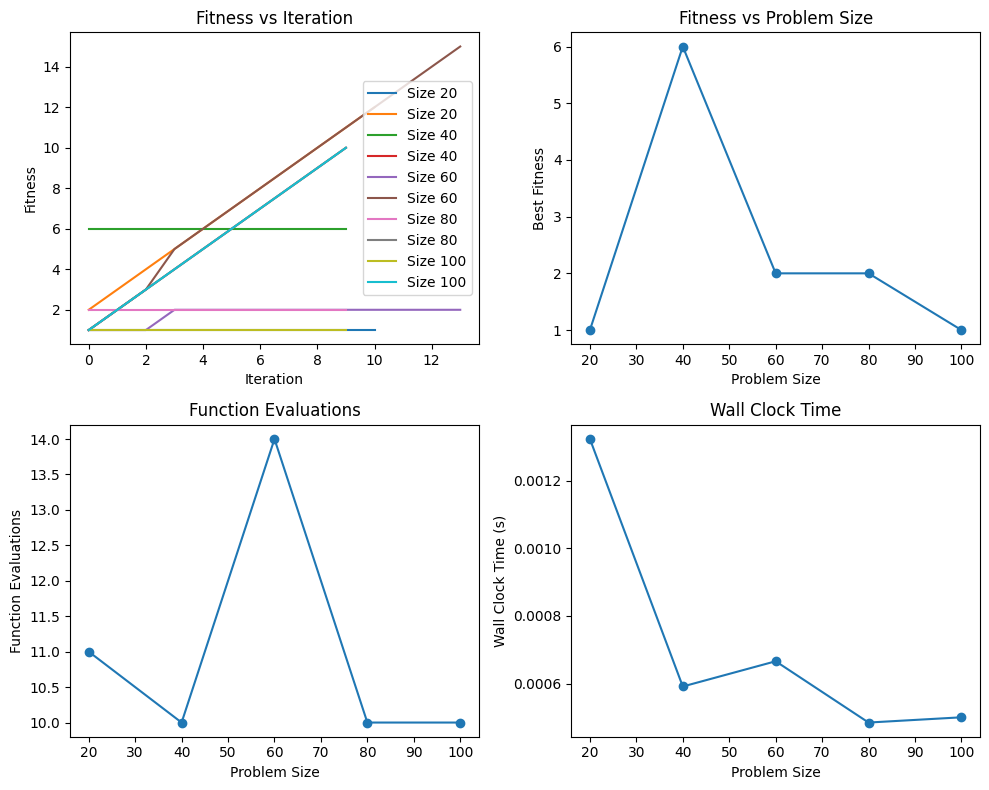

In [5]:
# Define a function to run the experiment
def run_rhc_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)

    # Run RHC
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True)
    end_time = time.time()

    # Gather results
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_experiment(size)
    results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')

plt.tight_layout()
plt.show()


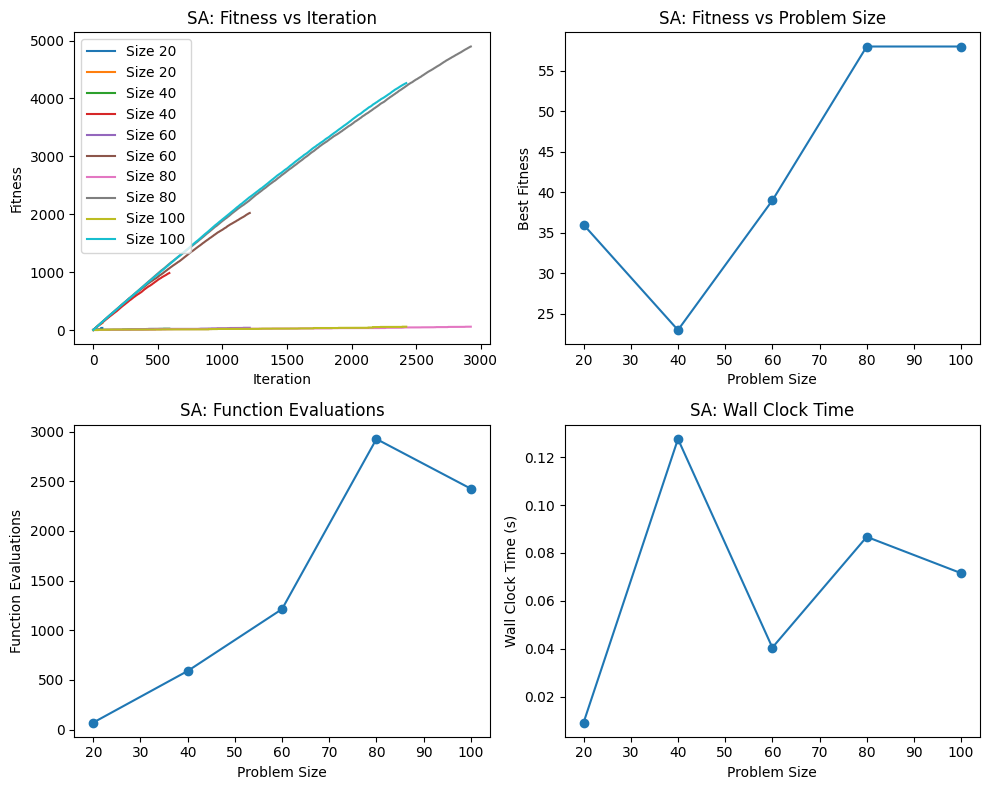

In [6]:
# Function to run SA experiment
def run_sa_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    
    schedule = mlrose.ExpDecay()
    
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True)
    end_time = time.time()
    
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
sa_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results for SA
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('SA: Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('SA: Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('SA: Wall Clock Time')

plt.tight_layout()
plt.show()


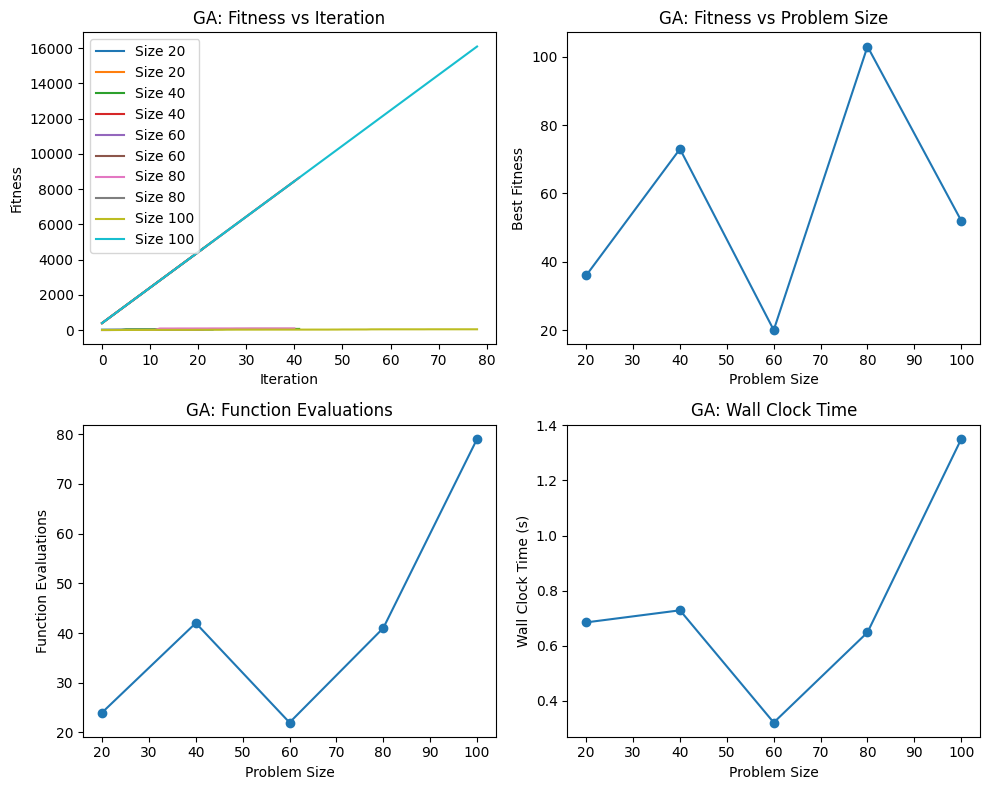

In [7]:
# Function to run GA experiment
def run_ga_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, curve=True)
    end_time = time.time()
    
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
ga_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results for GA
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('GA: Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('GA: Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('GA: Wall Clock Time')

plt.tight_layout()
plt.show()


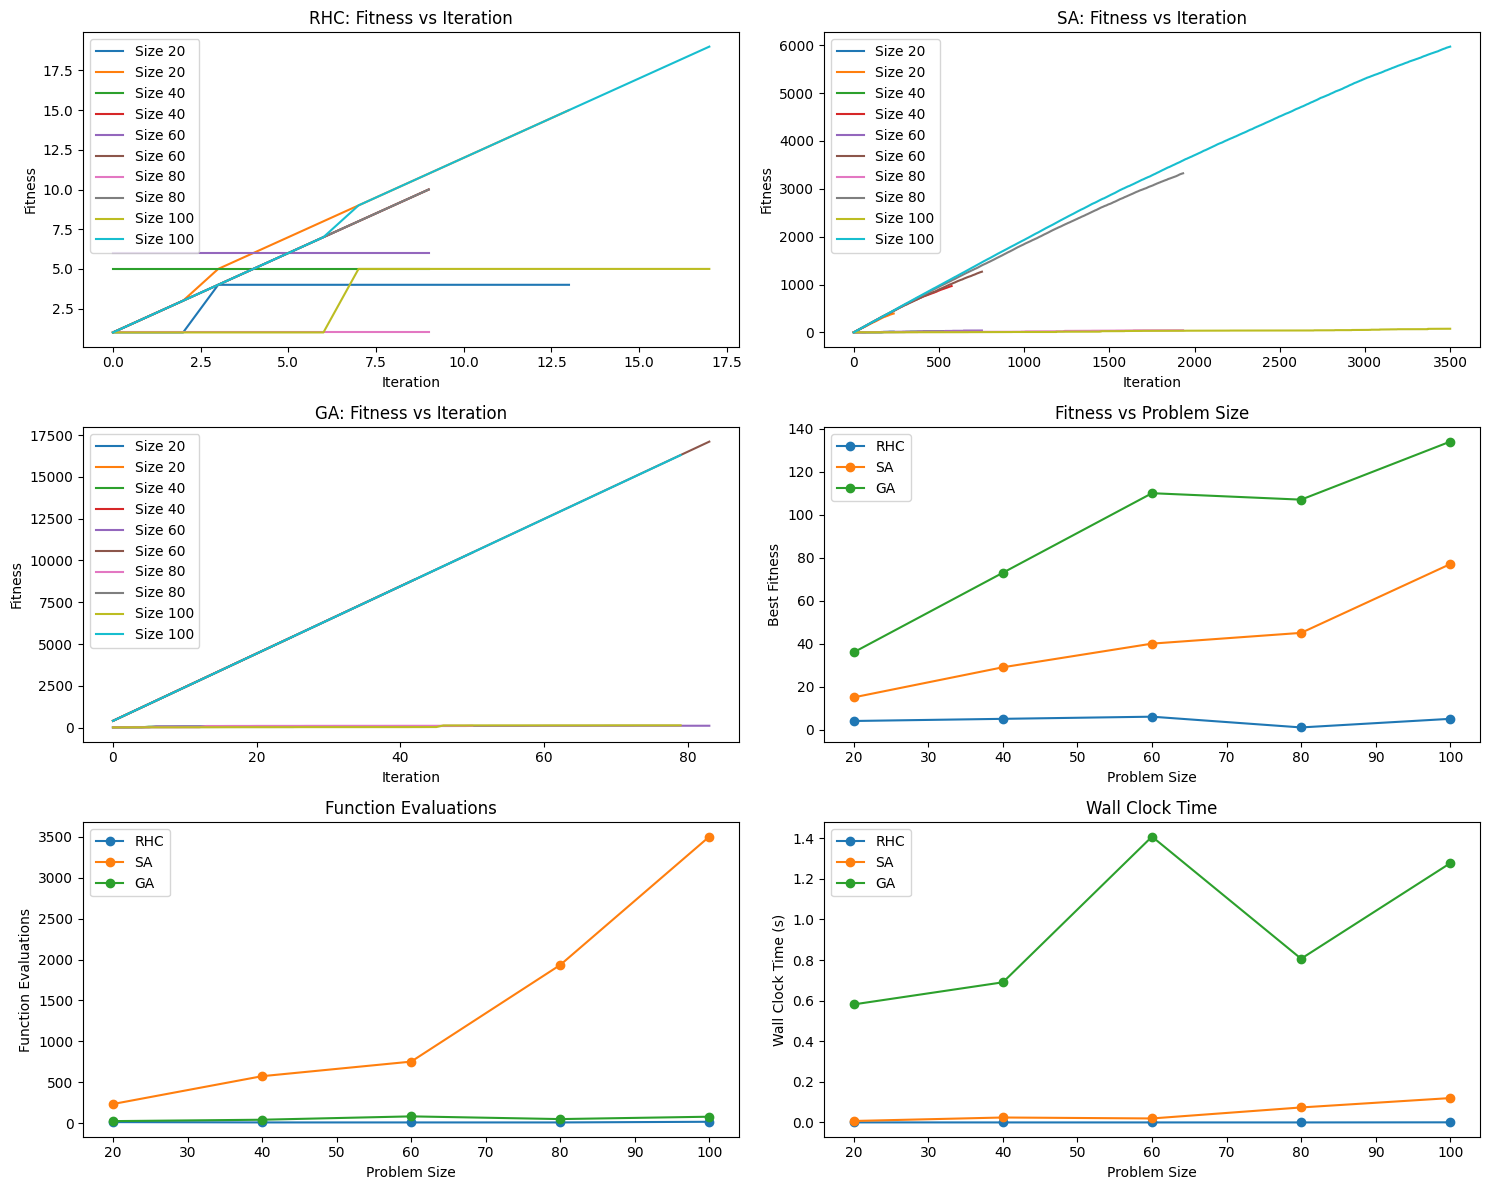

In [8]:
# Define the fitness function globally
fitness = mlrose.FourPeaks(t_pct=0.15)

# Function to run RHC experiment
def run_rhc_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run SA experiment
def run_sa_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    schedule = mlrose.ExpDecay()
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run GA experiment
def run_ga_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
rhc_results = []
sa_results = []
ga_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_rhc_experiment(size)
    rhc_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(15, 12))

# Fitness vs Iteration
plt.subplot(3, 2, 1)
for result in rhc_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('RHC: Fitness vs Iteration')
plt.legend()

plt.subplot(3, 2, 2)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

plt.subplot(3, 2, 3)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(3, 2, 4)
plt.plot(problem_sizes, [result['best_fitness'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')
plt.legend()

# Function Evaluations
plt.subplot(3, 2, 5)
plt.plot(problem_sizes, [result['function_evaluations'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')
plt.legend()

# Wall Clock Time
plt.subplot(3, 2, 6)
plt.plot(problem_sizes, [result['run_time'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')
plt.legend()

plt.tight_layout()
plt.show()
